<a href="https://colab.research.google.com/github/LucasWerppFranco/CP-1---Energias-Renovaveis/blob/main/Exerc%C3%ADcios/1CCPF_CP1_SERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando Bibliotecas**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor






**Criando Dataset c/ base no arquivo .txt externo**

In [23]:
df = pd.read_csv('/content/household_power_consumption.txt',
                 sep=';',
                 na_values='?')

**Análise Exploratória**

In [24]:
df.head(11)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


**Analisando Características do Dataset**

In [25]:
# Categorias da Tabela
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [26]:
# Tamanho do Dataset
df.shape
print(f"O Data frame possuí {df.shape[0]} linhas e {df.shape[1]} colunas")

O Data frame possuí 2075259 linhas e 9 colunas


In [27]:
# Características dos Atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [28]:
# Descrição Estátistica das Colunas
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


**Formatando Dataset**

In [29]:
# Converter as colunas numéricas que estão como object
cols_to_convert = ['Global_active_power', 'Global_reactive_power',
                   'Voltage', 'Global_intensity',
                   'Sub_metering_1', 'Sub_metering_2']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

**Exercícios Checkpoint**

**PARTE 1 – Exercícios iniciais com Individual Household Electric Power Consumption**

Ex. 1: Carregue o dataset e exiba as 10 primeiras linhas.

In [30]:
df.head(11)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


Ex. 2: Diferença entre as variáveis GAP e GRP

Global Active Power x Global Reactive Power.

A principal diferença entre potência ativa e reativa reside no fato de que a **potência ativa (P)** é a potência que realiza trabalho útil, convertendo energia elétrica em outras formas, como mecânica, térmica ou luminosa, enquanto a **potência reativa (Q)** é a potência necessária para manter campos eletromagnéticos em dispositivos como motores e transformadores, mas não realiza trabalho útil diretamente

Ex. 3: Verifique se existem valores ausentes no dataset. Quantifique-os.

In [31]:
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


Ex. 4: Converta a coluna "Date" para o tipo "datetime" e crie uma nova coluna com o dia da semana correspondente.

In [32]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Day of Week'] = df['Date'].dt.day_name()
display(df.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day of Week
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday


*Ex*. 5: Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de "Global_active_power".

In [33]:
# Garantir conversão da coluna Date
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Converter Global_active_power para numérico
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Filtrar registros de 2007
df_2007 = df[df['Date'].dt.year == 2007]

# Calcular média diária
daily_mean_2007 = df_2007.groupby('Date')['Global_active_power'].mean()

print("Média diária de Global_active_power em 2007 (primeiros 5 dias):")
print(daily_mean_2007.head())


Média diária de Global_active_power em 2007 (primeiros 5 dias):
Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
Name: Global_active_power, dtype: float64


Ex. 6: Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua
escolha.

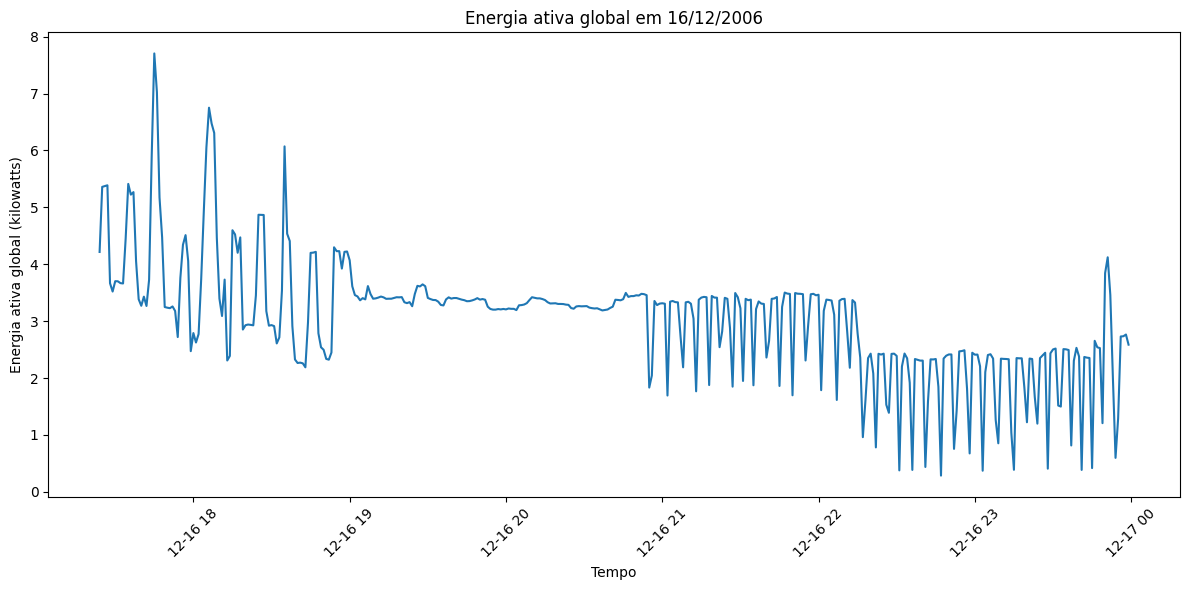

In [34]:
date_to_plot = df['Date'].iloc[0]

df_single_day = df[df['Date'] == date_to_plot].copy()

df_single_day['datetime'] = pd.to_datetime(df_single_day['Date'].astype(str) + ' ' + df_single_day['Time'], format='%Y-%m-%d %H:%M:%S')


df_single_day.set_index('datetime', inplace=True)

df_single_day['Global_active_power'] = pd.to_numeric(df_single_day['Global_active_power'], errors='coerce')
df_single_day.dropna(subset=['Global_active_power'], inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_single_day.index, y='Global_active_power', data=df_single_day)
plt.title(f'Energia ativa global em {date_to_plot.strftime("%d/%m/%Y")}')
plt.xlabel('Tempo')
plt.ylabel('Energia ativa global (kilowatts)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Ex. 7: Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?


<Axes: >

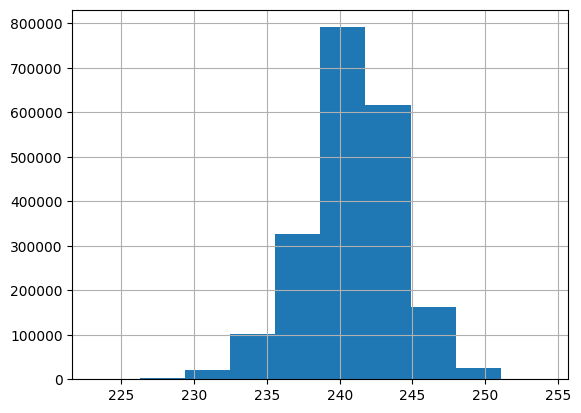

In [35]:
df["Voltage"].hist()

Ex. 8: Calcule o consumo médio por mês em todo o período disponível no dataset.


In [36]:
media=df["Global_active_power"].mean()
print(f"O consumo medio por mes é de {media:.2f} ")

O consumo medio por mes é de 1.09 


Ex. 9:  Identifique o dia com maior consumo de energia ativa global (Global_active_power).


In [37]:
consumo_diario = df.groupby('Date')['Global_active_power'].sum()

dia_maior_consumo = consumo_diario.idxmax()
valor_maior_consumo = consumo_diario.max()

print(f"O dia com maior consumo de energia ativa global é {dia_maior_consumo} com um total de {valor_maior_consumo} kW.")

O dia com maior consumo de energia ativa global é 2006-12-23 00:00:00 com um total de 4773.386 kW.


Ex. 10: Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.


In [38]:
df['Day_of_week'] = df['Date'].dt.dayofweek

df['Day_type'] = df['Day_of_week'].apply(lambda x: 'dias da semana' if x < 5 else 'finais de semana')

average_consumption_by_day_type = df.groupby('Day_type')['Global_active_power'].mean()

print("Consumo médio de energia ativa global:")
print(average_consumption_by_day_type)

Consumo médio de energia ativa global:
Day_type
dias da semana      1.035472
finais de semana    1.234232
Name: Global_active_power, dtype: float64


Ex. 11: Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

In [39]:
# Lista de colunas
Global_colunas = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Seleciona as colunas e calcula a correlação
correlacao = df[Global_colunas].corr()
print('a correlação das variáveis é: ')
print(correlacao)


a correlação das variáveis é: 
                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


Ex. 12: Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.

In [40]:
# Criando a variável Total_Sub_metering:
Total_Sub_metering = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
print('A soma da nova variável é de: ')
print(Total_Sub_metering)

A soma da nova variável é de: 
0          18.0
1          17.0
2          19.0
3          18.0
4          18.0
           ... 
2075254     0.0
2075255     0.0
2075256     0.0
2075257     0.0
2075258     0.0
Length: 2075259, dtype: float64


Ex. 13: Verifique se há algum mês em que o Total_Sub_metering ultrapassa a média de Global_active_power.

In [41]:
df['Month'] = df['Date'].dt.to_period('M')

#Criando a coluna Total_Sub_metering
df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

monthly_sub_metering = df.groupby('Month')['Total_Sub_metering'].sum()
monthly_global_active_power = df.groupby('Month')['Global_active_power'].mean()

comparacao = monthly_sub_metering > monthly_global_active_power

print("Meses onde Total_Sub_metering ultrapassa a média de Global_active_power:")
print(comparacao[comparacao])

Meses onde Total_Sub_metering ultrapassa a média de Global_active_power:
Month
2006-12    True
2007-01    True
2007-02    True
2007-03    True
2007-04    True
2007-05    True
2007-06    True
2007-07    True
2007-08    True
2007-09    True
2007-10    True
2007-11    True
2007-12    True
2008-01    True
2008-02    True
2008-03    True
2008-04    True
2008-05    True
2008-06    True
2008-07    True
2008-08    True
2008-09    True
2008-10    True
2008-11    True
2008-12    True
2009-01    True
2009-02    True
2009-03    True
2009-04    True
2009-05    True
2009-06    True
2009-07    True
2009-08    True
2009-09    True
2009-10    True
2009-11    True
2009-12    True
2010-01    True
2010-02    True
2010-03    True
2010-04    True
2010-05    True
2010-06    True
2010-07    True
2010-08    True
2010-09    True
2010-10    True
2010-11    True
Freq: M, dtype: bool


Ex. 14: Faça um gráfico de série temporal do Voltage para o ano de 2008:

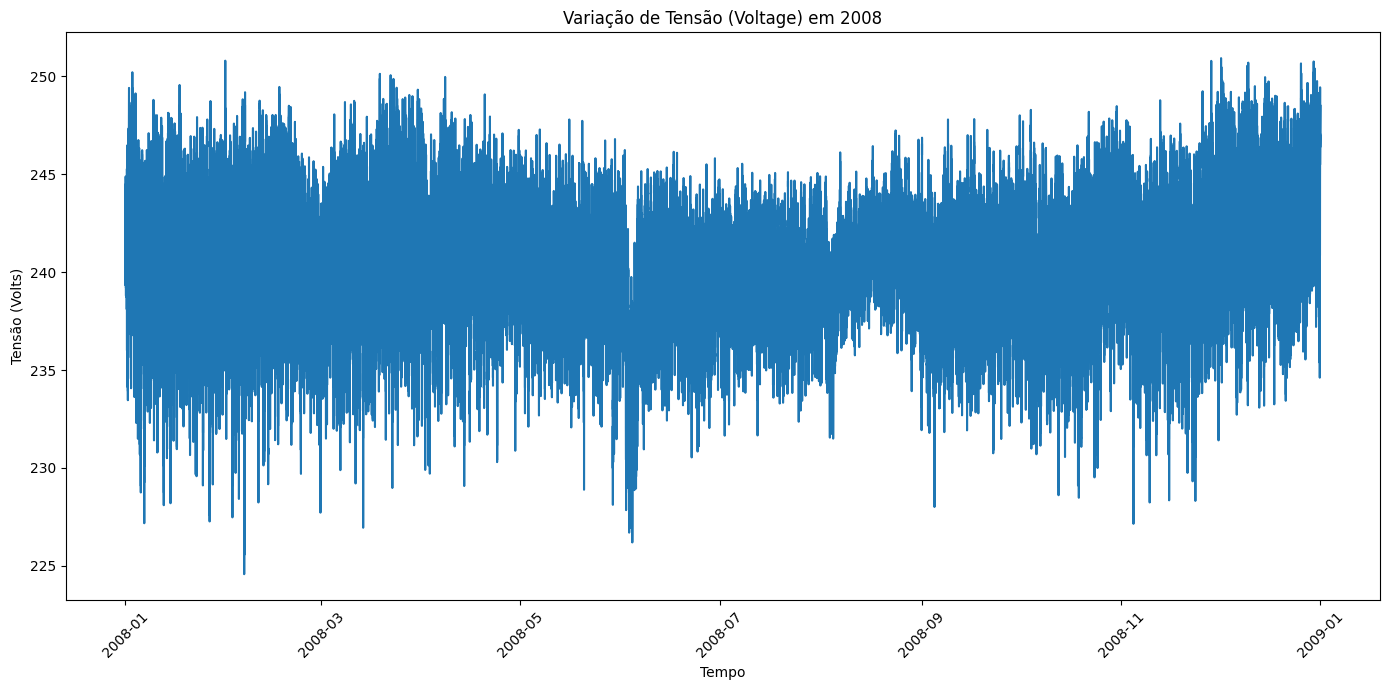

In [42]:
# Filter data for the year 2008
df_2008 = df[df['Date'].dt.year == 2008].copy()

# Combine 'Date' and 'Time' columns into a datetime index
df_2008['datetime'] = pd.to_datetime(df_2008['Date'].astype(str) + ' ' + df_2008['Time'], format='%Y-%m-%d %H:%M:%S')
df_2008.set_index('datetime', inplace=True)

# Ensure 'Voltage' is numeric and drop missing values for plotting
df_2008['Voltage'] = pd.to_numeric(df_2008['Voltage'], errors='coerce')
df_2008.dropna(subset=['Voltage'], inplace=True)

# Create the time series plot
plt.figure(figsize=(14, 7))
sns.lineplot(x=df_2008.index, y='Voltage', data=df_2008)
plt.title('Variação de Tensão (Voltage) em 2008')
plt.xlabel('Tempo')
plt.ylabel('Tensão (Volts)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ex. 15: Compare o consumo entre os meses de verão e inverno (no hemisfério norte).

In [43]:
# Define os meses de verão e inverno (Hemisfério Norte)
meses_de_verao = [6, 7, 8]
meses_de_inverno = [12, 1, 2]

# Filtra os dados para os meses de verão e inverno
df_verao = df[df['Date'].dt.month.isin(meses_de_verao)]
df_inverno = df[df['Date'].dt.month.isin(meses_de_inverno)]

# Calcula a média de Global_active_power para verão e inverno
media_do_verao = df_verao['Global_active_power'].mean()
media_do_inverno = df_inverno['Global_active_power'].mean()

print(f"Consumo médio de Global_active_power no verão (Hemisfério Norte): {media_do_verao:.2f} kW")
print(f"Consumo médio de Global_active_power no inverno (Hemisfério Norte): {media_do_inverno:.2f} kW")

Consumo médio de Global_active_power no verão (Hemisfério Norte): 0.73 kW
Consumo médio de Global_active_power no inverno (Hemisfério Norte): 1.42 kW


Ex. 16: Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.*texto em itálico*

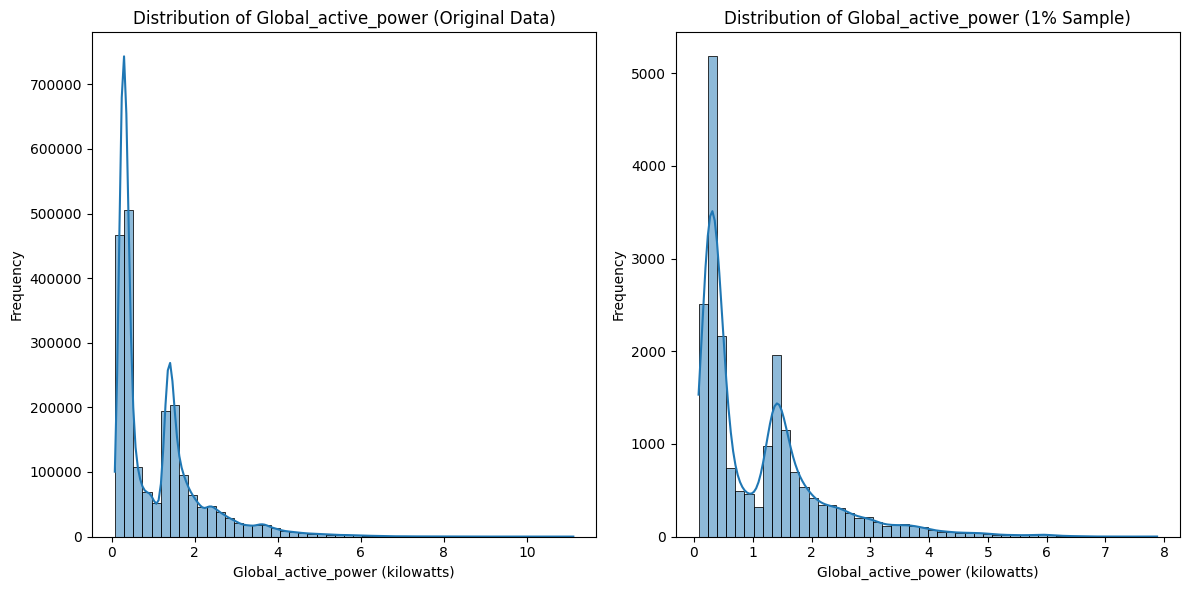

In [44]:
# Create a 1% random sample of the data
df_sample = df.sample(frac=0.01, random_state=42)

# Plot histograms to compare distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(df['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global_active_power (Original Data)')
plt.xlabel('Global_active_power (kilowatts)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(df_sample['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global_active_power (1% Sample)')
plt.xlabel('Global_active_power (kilowatts)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Ex. 17: Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.[texto do link](https://)

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns to scale (excluding Date, Time, Day of Week, Day_of_week, Day_type, Month)
numerical_cols = ['Global_active_power', 'Global_reactive_power',
                  'Voltage', 'Global_intensity',
                  'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("DataFrame after Min-Max Scaling:")
display(df.head())

DataFrame after Min-Max Scaling:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day of Week,Day_of_week,Day_type,Month,Total_Sub_metering
0,2006-12-16,17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,Saturday,5,finais de semana,2006-12,0.134328
1,2006-12-16,17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,Saturday,5,finais de semana,2006-12,0.126866
2,2006-12-16,17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,Saturday,5,finais de semana,2006-12,0.141791
3,2006-12-16,17:27:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,Saturday,5,finais de semana,2006-12,0.134328
4,2006-12-16,17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,Saturday,5,finais de semana,2006-12,0.134328


Ex. 18: Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.

Mean consumption by cluster:


,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3
cluster,,,,
0,131.029659,19.021151,22.183996,291.891758
1,69.899648,8.185079,14.671875,138.451430
2,183.774120,25.333543,32.027795,442.755957


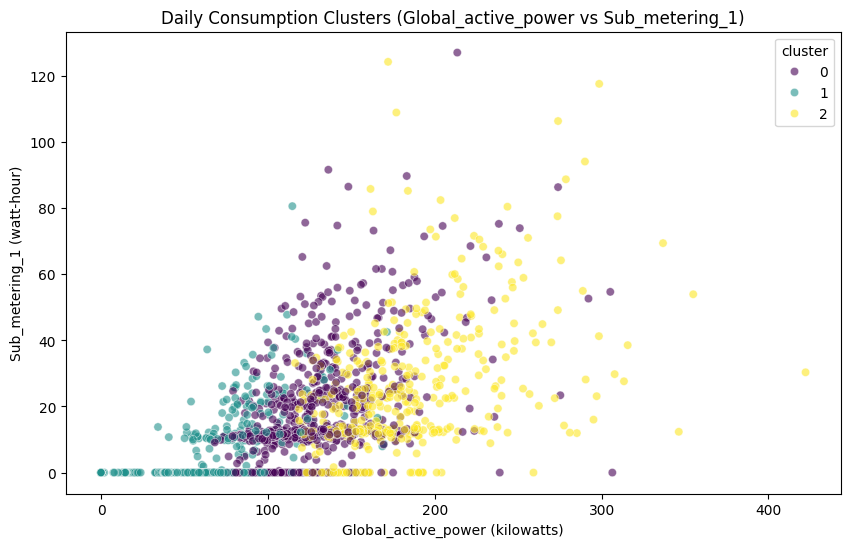

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate consumption data by day.
# We'll use the sum of Global_active_power and the sum of the sub-meterings as features for clustering.
daily_consumption = df.groupby('Date')[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum().dropna()

# Select features for clustering
X = daily_consumption[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # n_init='auto' is also a good option in newer sklearn versions
daily_consumption['cluster'] = kmeans.fit_predict(X)

# Interpret the results by examining the mean consumption for each cluster
cluster_interpretation = daily_consumption.groupby('cluster')[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

print("Mean consumption by cluster:")
display(cluster_interpretation)

# Optional: Visualize the clusters (e.g., using a scatter plot of two features)
# Here we'll plot Global_active_power vs Sub_metering_1 as an example
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Global_active_power', y='Sub_metering_1', hue='cluster', data=daily_consumption, palette='viridis', alpha=0.6)
plt.title('Daily Consumption Clusters (Global_active_power vs Sub_metering_1)')
plt.xlabel('Global_active_power (kilowatts)')
plt.ylabel('Sub_metering_1 (watt-hour)')
plt.show()

Ex. 19: Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.

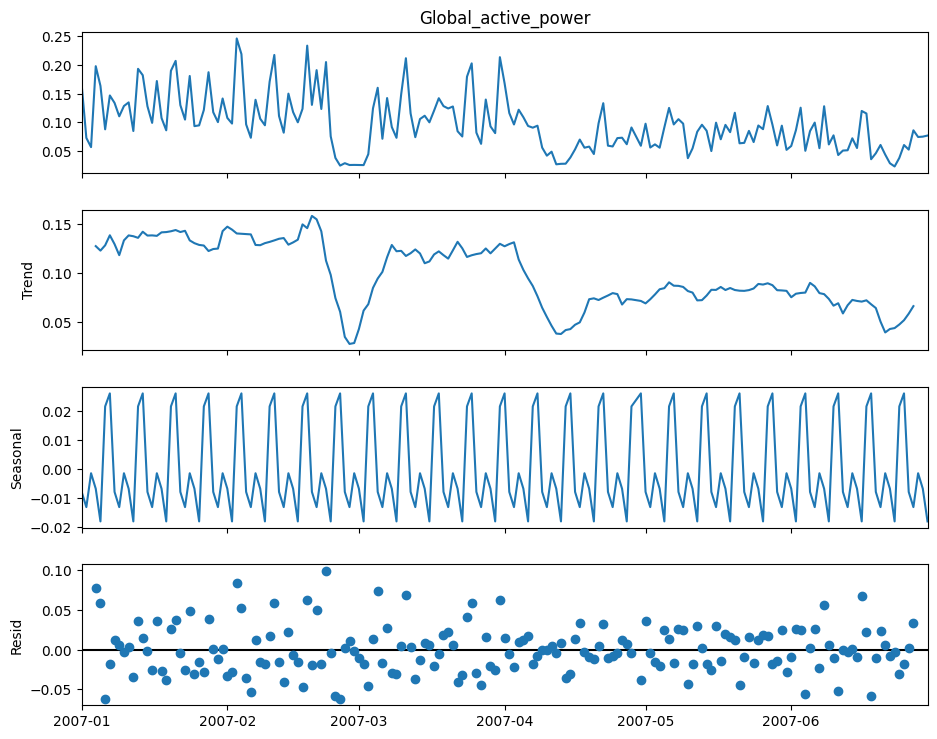

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the DataFrame is sorted by Date and Time for time series analysis
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index('datetime').sort_index()

# Resample the data to a lower frequency (e.g., daily) for decomposition
# Using mean to aggregate the 'Global_active_power' for each day
daily_data = df['Global_active_power'].resample('D').mean().dropna()

# Select a 6-month period for decomposition
# Adjust the start and end dates as needed based on your data's time range
start_date = '2007-01-01'
end_date = '2007-06-30'
six_month_period = daily_data[start_date:end_date]

# Perform seasonal decomposition
# The model can be 'additive' or 'multiplicative'
# The period should be set based on the seasonality of your data (e.g., 7 for daily data with weekly seasonality)
# If you expect yearly seasonality with daily data, the period would be 365 (or 365.25)
# For simplicity, let's assume a weekly seasonality for daily data in this example (period=7)
decomposition = seasonal_decompose(six_month_period, model='additive', period=7)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

Ex. 20: Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo.

Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


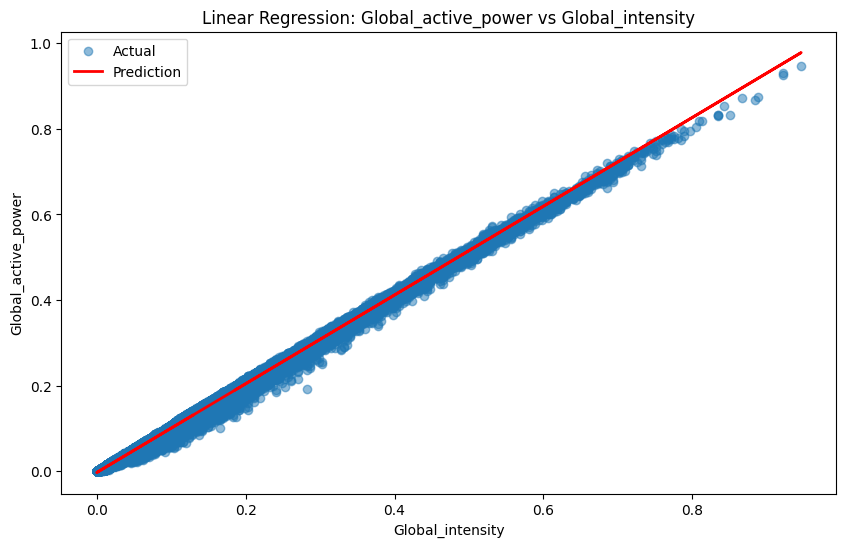

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data - drop rows with missing values in the relevant columns
df_regression = df[['Global_active_power', 'Global_intensity']].dropna()

# Define features (X) and target (y)
X = df_regression[['Global_intensity']]
y = df_regression['Global_active_power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Optional: Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
plt.title('Linear Regression: Global_active_power vs Global_intensity')
plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()

**PARTE 2 – Exercícios adicionais no dataset inicial**

Ex. 21: Séries temporais por hora
- Converta Date e Time em índice datetime.
- Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
- Identifique os horários de maior consumo médio ao longo do dia.
Observação: uma série temporal é um conjunto de dados registrados em ordem cronológica, útil
para identificar padrões de comportamento ao longo do tempo.

/tmp/ipython-input-498425829.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df['Global_active_power'].resample('H').mean().dropna()


Hourly average consumption:
datetime
0     0.052830
1     0.041945
2     0.036630
3     0.033392
4     0.033301
5     0.034191
6     0.064784
7     0.129130
8     0.125379
9     0.113674
10    0.107271
11    0.105958
12    0.102396
13    0.096729
14    0.091142
15    0.082818
16    0.079016
17    0.088735
18    0.113202
19    0.150048
20    0.165044
21    0.162961
22    0.121010
23    0.074791
Name: Global_active_power, dtype: float64

The hour with the highest average consumption is hour 20 with an average of 0.17 kW.


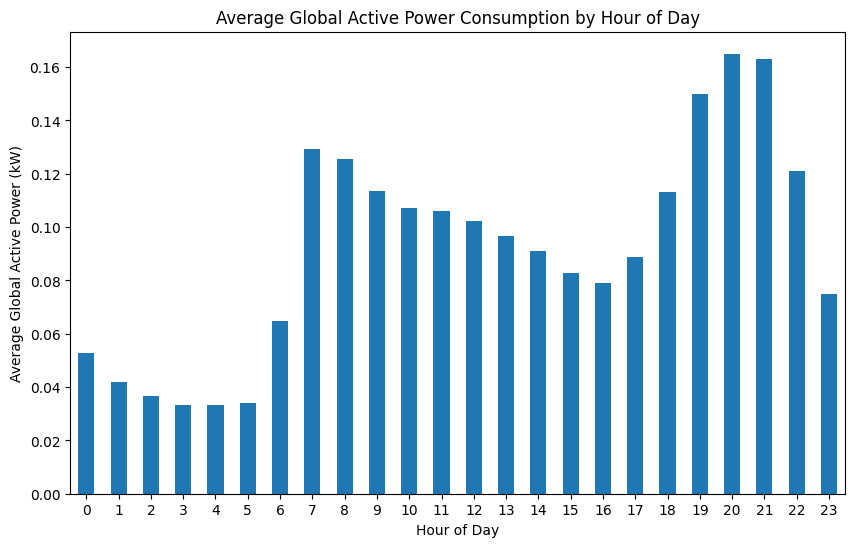

In [49]:
# Convert 'Date' and 'Time' to datetime index
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index('datetime').sort_index()

# Resample data to hourly intervals and calculate the mean of Global_active_power
hourly_data = df['Global_active_power'].resample('H').mean().dropna()

# Identify the hours of highest average consumption
# Group by hour of the day and calculate the mean
hourly_mean_consumption = hourly_data.groupby(hourly_data.index.hour).mean()

# Find the hour with the maximum mean consumption
hour_of_highest_consumption = hourly_mean_consumption.idxmax()
max_average_consumption = hourly_mean_consumption.max()

print(f"Hourly average consumption:\n{hourly_mean_consumption}\n")
print(f"The hour with the highest average consumption is hour {hour_of_highest_consumption} with an average of {max_average_consumption:.2f} kW.")

# Optional: Plot the average consumption by hour
plt.figure(figsize=(10, 6))
hourly_mean_consumption.plot(kind='bar')
plt.title('Average Global Active Power Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Global Active Power (kW)')
plt.xticks(rotation=0)
plt.show()

Ex. 22: Autocorrelação do consumo
- Use a série temporal de Global_active_power.
- Calcule a autocorrelação em lags de 1h, 24h e 48h.
- Pergunta: existem padrões repetidos diariamente

In [50]:
from statsmodels.tsa.stattools import acf
import numpy as np

# Calculate the autocorrelation for specified lags
# We'll use the hourly data created in the previous step
lags = [1, 24, 48]
autocorr_values = acf(hourly_data, nlags=max(lags), fft=False)

print("Autocorrelation of Global_active_power:")
for lag in lags:
    print(f"Lag {lag} hours: {autocorr_values[lag]:.4f}")

# Interpretation of results:
# A high autocorrelation value at a specific lag suggests a strong correlation
# between the series and its lagged version at that time difference.
# High values at 24h and 48h would indicate daily and two-day patterns.

Autocorrelation of Global_active_power:
Lag 1 hours: 0.7132
Lag 24 hours: 0.4346
Lag 48 hours: 0.3981


Ex. 23: Redução de dimensionalidade com PCA
- Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Aplique PCA para reduzir para 2 componentes principais.
- Analise a variância explicada por cada componente.

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select the relevant columns for PCA
pca_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_pca = df[pca_cols].dropna()

# Standardize the data before applying PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# Apply PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Create a new DataFrame with the principal components
df_principal_components = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])

# Add the Date and Time back to the principal components DataFrame for potential future use
# Aligning by index after dropping NaNs and before scaling is crucial
df_principal_components.index = df_pca.index

# Analyze the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio by principal component:")
print(f"Principal Component 1: {explained_variance_ratio[0]:.4f}")
print(f"Principal Component 2: {explained_variance_ratio[1]:.4f}")
print(f"Total explained variance: {explained_variance_ratio.sum():.4f}")

# Display the first few rows of the new DataFrame
print("\nFirst 5 rows of the DataFrame with principal components:")
display(df_principal_components.head())

Explained variance ratio by principal component:
Principal Component 1: 0.5910
Principal Component 2: 0.2272
Total explained variance: 0.8182

First 5 rows of the DataFrame with principal components:


,principal_component_1,principal_component_2
datetime,,
2006-12-16 17:24:00,5.191176,1.241976
2006-12-16 17:25:00,6.698092,1.070631
2006-12-16 17:26:00,6.894031,1.544068
2006-12-16 17:27:00,6.857242,1.623923
2006-12-16 17:28:00,4.661351,2.337338


Ex. 24: Visualização de clusters no espaço PCA
- Combine os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma clara?

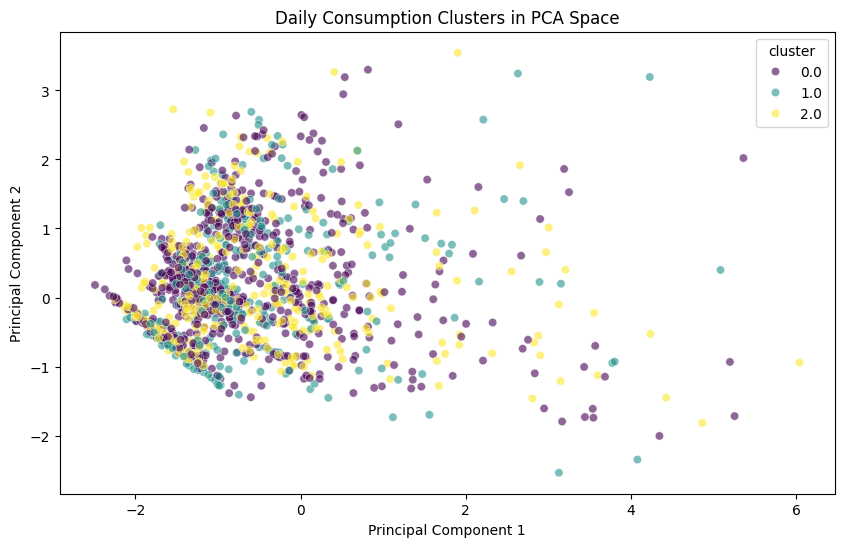

In [52]:
# Ensure that the 'daily_consumption' DataFrame and 'df_principal_components' DataFrame
# have the same index before merging. This was done in the previous PCA step.

# Add the cluster labels from the K-Means analysis to the PCA results DataFrame
# We need to align the cluster labels with the PCA results based on the date index.
# Make sure the index of daily_consumption is aligned with df_principal_components.
# In the previous steps, we ensured that both dataframes have the 'Date' as index after dropping NaNs.

# Re-run K-Means on the daily_consumption data to get the cluster labels again,
# ensuring it aligns with the PCA results.
from sklearn.cluster import KMeans

# Aggregate consumption data by day (as done in Ex. 18)
daily_consumption = df.groupby('Date')[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum().dropna()

# Select features for clustering
X_kmeans = daily_consumption[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
daily_consumption['cluster'] = kmeans.fit_predict(X_kmeans)

# Now, merge the cluster labels with the PCA results
# We need to make sure the indices match.
# Since both daily_consumption and df_principal_components now have the Date as index, we can join them.
df_pca_clusters = df_principal_components.join(daily_consumption['cluster'])

# Drop any rows where there might be a mismatch after joining (shouldn't happen if indices are aligned)
df_pca_clusters.dropna(inplace=True)


# Plot the clusters in the PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster', data=df_pca_clusters, palette='viridis', alpha=0.6)
plt.title('Daily Consumption Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Interpretation:
# Observe if the different colored points (representing the clusters) form distinct groups
# in the scatter plot. If they are well-separated, it indicates that K-Means was able to
# find meaningful clusters based on the original features, and the PCA components
# capture the variance that distinguishes these clusters.

Ex. 25: Regressão polinomial vs linear
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada.

Simple Linear Regression RMSE: 0.0880
Polynomial Regression (Degree 2) RMSE: 0.0876


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


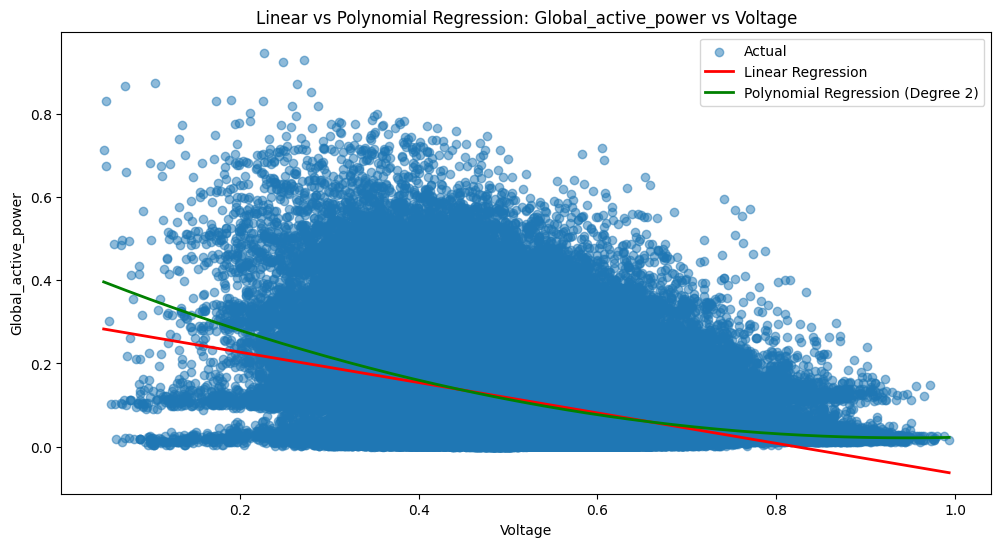

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data - drop rows with missing values in the relevant columns
df_regression = df[['Global_active_power', 'Voltage']].dropna().copy()

# Define features (X) and target (y)
X = df_regression[['Voltage']]
y = df_regression['Global_active_power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Simple Linear Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"Simple Linear Regression RMSE: {rmse_linear:.4f}")

# --- Polynomial Regression (Degree 2) ---
# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly, y_train)
y_pred_polynomial = polynomial_model.predict(X_test_poly)
rmse_polynomial = np.sqrt(mean_squared_error(y_test, y_pred_polynomial))

print(f"Polynomial Regression (Degree 2) RMSE: {rmse_polynomial:.4f}")

# --- Visualize the results ---
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')

# Sort the test data for smoother plotting of the regression lines
X_test_sorted = np.sort(X_test, axis=0)
y_pred_linear_sorted = linear_model.predict(X_test_sorted)
X_test_poly_sorted = poly_features.transform(X_test_sorted)
y_pred_polynomial_sorted = polynomial_model.predict(X_test_poly_sorted)


plt.plot(X_test_sorted, y_pred_linear_sorted, color='red', linewidth=2, label='Linear Regression')
plt.plot(X_test_sorted, y_pred_polynomial_sorted, color='green', linewidth=2, label='Polynomial Regression (Degree 2)')

plt.title('Linear vs Polynomial Regression: Global_active_power vs Voltage')
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()

**PARTE 3 – Novo dataset Appliances Energy Prediction**

Arquivos

In [54]:
df = pd.read_csv("/content/energydata_complete.csv")

In [55]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


**Exercicio 31:**
Regressão Linear Múltipla
- Modele Appliances em função das variáveis ambientais.
- Avalie R² e erro médio.

In [56]:
X = df.drop(['date', 'Appliances', 'lights'], axis=1)
y = df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² (Coefficient of Determination): {r2:.2f}")

RMSE (Root Mean Squared Error): 92.45
R² (Coefficient of Determination): 0.15


**Exercicio 32**: Random Forest Regressor
- Treine um modelo de Random Forest para prever Appliances.
- Compare o RMSE com a regressão linear.


In [57]:
X = df.drop(['date', 'Appliances', 'lights'], axis=1)
y = df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"RMSE da Regressão Linear: {rmse_lr:.2f}")
print(f"R² da Regressão Linear: {r2_lr:.2f}")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRMSE do Random Forest Regressor: {rmse_rf:.2f}")
print(f"R² do Random Forest Regressor: {r2_rf:.2f}")

print(f"\nComparação de RMSE:")
print(f"RMSE da Regressão Linear: {rmse_lr:.2f}")
print(f"RMSE do Random Forest Regressor: {rmse_rf:.2f}")

if rmse_rf < rmse_lr:
    print("O Random Forest Regressor tem um RMSE menor que a Regressão Linear.")
elif rmse_rf > rmse_lr:
    print("O Random Forest Regressor tem um RMSE maior que a Regressão Linear.")
else:
    print("O Random Forest Regressor e a Regressão Linear têm o mesmo RMSE.")

RMSE da Regressão Linear: 92.45
R² da Regressão Linear: 0.15


KeyboardInterrupt: 

**Exercicio 33**: K-Means clustering
- Aplique K-Means com 3 a 5 clusters.
- Interprete os perfis de consumo

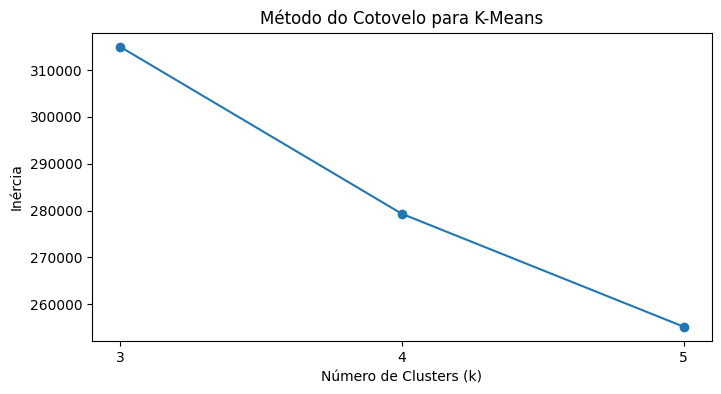


Análise de clusters para k=3:
                  T1       RH_1         T2       RH_2         T3       RH_3  \
cluster_3                                                                     
0          21.026199  37.763553  19.075241  39.103611  21.429605  37.336814   
1          23.418270  41.559645  22.693036  40.500366  24.573040  39.056934   
2          20.865061  43.702119  19.974505  42.992497  21.090421  43.340834   

                  T4       RH_4         T5       RH_5  ...         T9  \
cluster_3                                              ...              
0          20.174485  36.128557  18.854013  49.191885  ...  18.859352   
1          23.168944  39.627240  21.693454  49.904654  ...  21.880456   
2          19.349058  44.158456  18.466915  55.818977  ...  17.768102   

                RH_9      T_out  Press_mm_hg     RH_out  Windspeed  \
cluster_3                                                            
0          39.039590   4.092176   757.050571  81.455102   3.281653 

In [58]:
df = pd.read_csv("/content/energydata_complete.csv")

X_clustering = df.drop(['date', 'Appliances', 'lights'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

inertia = []
for k in range(3, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    df[f'cluster_{k}'] = kmeans.labels_
plt.figure(figsize=(8, 4))
plt.plot(range(3, 6), inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para K-Means')
plt.xticks(range(3, 6))
plt.show()

print("\nAnálise de clusters para k=3:")
print(df.groupby('cluster_3')[X_clustering.columns].mean())

print("\nAnálise de clusters para k=4:")
print(df.groupby('cluster_4')[X_clustering.columns].mean())

print("\nAnálise de clusters para k=5:")
print(df.groupby('cluster_5')[X_clustering.columns].mean())

**Exercicio 34**: Classificação binária
- Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest Classifier.

In [59]:
mediana_appliances = df['Appliances'].median()
df['alto_consumo'] = (df['Appliances'] > mediana_appliances).astype(int)

X_clf = df.drop(['date', 'Appliances', 'lights', 'alto_consumo'], axis=1)
y_clf = df['alto_consumo']

X_treino_clf, X_teste_clf, y_treino_clf, y_teste_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

scaler_clf = StandardScaler()
X_treino_escalado_clf = scaler_clf.fit_transform(X_treino_clf)
X_teste_escalado_clf = scaler_clf.transform(X_teste_clf)

modelo_lr_clf = LogisticRegression(max_iter=1000)
modelo_lr_clf.fit(X_treino_escalado_clf, y_treino_clf)

modelo_rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf_clf.fit(X_treino_escalado_clf, y_treino_clf)

print("Modelos treinados: Regressão Logística e Random Forest Classifier.")

Modelos treinados: Regressão Logística e Random Forest Classifier.


**Exercicio 35**: Avaliação de classificação
- Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score).
- Pergunta: o modelo erra mais para alto ou para baixo consumo?

Avaliação do Modelo de Regressão Logística:

Matriz de Confusão (Regressão Logística):
[[1691  436]
 [ 519 1301]]


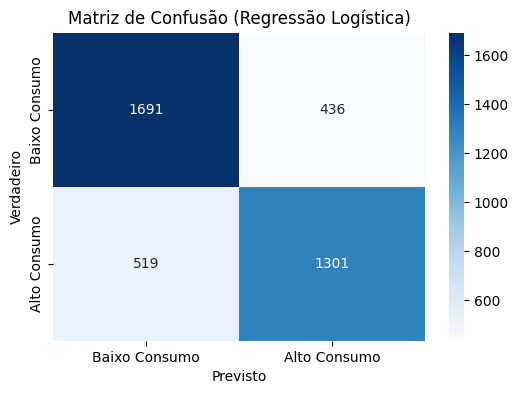

Acurácia (Regressão Logística): 0.76
Precisão (Regressão Logística): 0.75
Recall (Regressão Logística): 0.71
F1-score (Regressão Logística): 0.73


Avaliação do Modelo Random Forest Classifier:

Matriz de Confusão (Random Forest Classifier):
[[1945  182]
 [ 222 1598]]


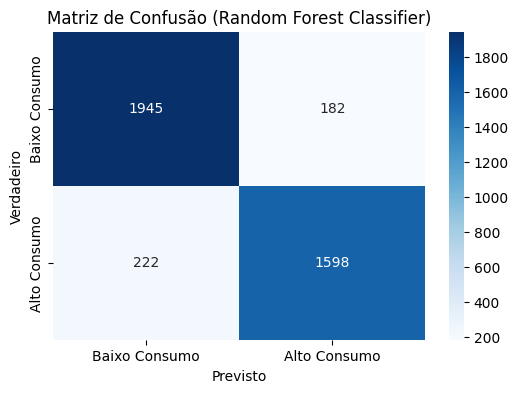

Acurácia (Random Forest Classifier): 0.90
Precisão (Random Forest Classifier): 0.90
Recall (Random Forest Classifier): 0.88
F1-score (Random Forest Classifier): 0.89

Análise de Erros:

Regressão Logística:
Erros em prever Alto Consumo (Falsos Positivos): 436
Erros em prever Baixo Consumo (Falsos Negativos): 519
O modelo de Regressão Logística erra mais ao prever Baixo Consumo (mais Falsos Negativos).

Random Forest Classifier:
Erros em prever Alto Consumo (Falsos Positivos): 182
Erros em prever Baixo Consumo (Falsos Negativos): 222
O modelo Random Forest Classifier erra mais ao prever Baixo Consumo (mais Falsos Negativos).


In [60]:
print("Avaliação do Modelo de Regressão Logística:")
y_pred_lr_clf = modelo_lr_clf.predict(X_teste_escalado_clf)

cm_lr = confusion_matrix(y_teste_clf, y_pred_lr_clf)
print("\nMatriz de Confusão (Regressão Logística):")
print(cm_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo Consumo', 'Alto Consumo'], yticklabels=['Baixo Consumo', 'Alto Consumo'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão (Regressão Logística)')
plt.show()

accuracy_lr = accuracy_score(y_teste_clf, y_pred_lr_clf)
precision_lr = precision_score(y_teste_clf, y_pred_lr_clf)
recall_lr = recall_score(y_teste_clf, y_pred_lr_clf)
f1_lr = f1_score(y_teste_clf, y_pred_lr_clf)

print(f"Acurácia (Regressão Logística): {accuracy_lr:.2f}")
print(f"Precisão (Regressão Logística): {precision_lr:.2f}")
print(f"Recall (Regressão Logística): {recall_lr:.2f}")
print(f"F1-score (Regressão Logística): {f1_lr:.2f}")


print("\n" + "="*50 + "\n")

print("Avaliação do Modelo Random Forest Classifier:")
y_pred_rf_clf = modelo_rf_clf.predict(X_teste_escalado_clf)

cm_rf = confusion_matrix(y_teste_clf, y_pred_rf_clf)
print("\nMatriz de Confusão (Random Forest Classifier):")
print(cm_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo Consumo', 'Alto Consumo'], yticklabels=['Baixo Consumo', 'Alto Consumo'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão (Random Forest Classifier)')
plt.show()


accuracy_rf = accuracy_score(y_teste_clf, y_pred_rf_clf)
precision_rf = precision_score(y_teste_clf, y_pred_rf_clf)
recall_rf = recall_score(y_teste_clf, y_pred_rf_clf)
f1_rf = f1_score(y_teste_clf, y_pred_rf_clf)

print(f"Acurácia (Random Forest Classifier): {accuracy_rf:.2f}")
print(f"Precisão (Random Forest Classifier): {precision_rf:.2f}")
print(f"Recall (Random Forest Classifier): {recall_rf:.2f}")
print(f"F1-score (Random Forest Classifier): {f1_rf:.2f}")

print("\nAnálise de Erros:")

tn_lr, fp_lr, fn_lr, tp_lr = cm_lr.ravel()
false_positives_lr = fp_lr
false_negatives_lr = fn_lr

print("\nRegressão Logística:")
print(f"Erros em prever Alto Consumo (Falsos Positivos): {false_positives_lr}")
print(f"Erros em prever Baixo Consumo (Falsos Negativos): {false_negatives_lr}")

if false_positives_lr > false_negatives_lr:
    print("O modelo de Regressão Logística erra mais ao prever Alto Consumo (mais Falsos Positivos).")
elif false_positives_lr < false_negatives_lr:
    print("O modelo de Regressão Logística erra mais ao prever Baixo Consumo (mais Falsos Negativos).")
else:
    print("O modelo de Regressão Logística comete um número semelhante de Falsos Positivos e Falsos Negativos.")

tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
false_positives_rf = fp_rf
false_negatives_rf = fn_rf

print("\nRandom Forest Classifier:")
print(f"Erros em prever Alto Consumo (Falsos Positivos): {false_positives_rf}")
print(f"Erros em prever Baixo Consumo (Falsos Negativos): {false_negatives_rf}")

if false_positives_rf > false_negatives_rf:
    print("O modelo Random Forest Classifier erra mais ao prever Alto Consumo (mais Falsos Positivos).")
elif false_positives_rf < false_negatives_rf:
    print("O modelo Random Forest Classifier erra mais ao prever Baixo Consumo (mais Falsos Negativos).")
else:
    print("O modelo Random Forest Classifier comete um número semelhante de Falsos Positivos e Falsos Negativos.")

**PARTE 4 – Exercícios no Orange Data Mining**

> **Observação:** Os exercícios 36 a 40 foram realizados no Orange Data Mining.  
> O arquivo nomeado como "Orange_Data_Mining_Ex36-40" com esses exercícios está disponível no repositório do Github.
link: https://github.com/LucasWerppFranco/CP-1---Energias-Renovaveis

Ex. 36 a 40:

In [61]:
from IPython.display import Image, display
display(Image(url='https://raw.githubusercontent.com/LucasWerppFranco/CP-1---Energias-Renovaveis/main/Arquivos_adicionais/Ex36-40.png'))